In [1]:
from scipy.io.wavfile import read
from IPython.display import Audio, display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier as DTC
from numpy.testing import rundocs

import matplotlib.pyplot as plt
import numpy as np
import librosa
import os

# Load dataset

In [2]:
dataset = "dataset/splitted/"
num_labels = 10

In [3]:
labels = []
audios = []
for label in range(num_labels):
    label_path = f"{dataset}/{label}"
    for file in sorted(os.listdir(label_path)):
        file_path = label_path + "/" + file
        sample_rate, audio = read(file_path)
        labels.append(label)
        audios.append(audio)
labels = np.array(labels)

# Prepare features

In [4]:
max_duration_sec = 0.6
max_duration = int(max_duration_sec * sample_rate + 1e-6)

In [5]:
features = []
features_flatten = []
for audio in audios:
    if len(audio) < max_duration:
        audio = np.pad(audio, (0, max_duration - len(audio)), constant_values=0)
    feature = librosa.feature.melspectrogram(audio.astype(float), sample_rate, n_mels=80, fmax=4000)
    #print("ALERT! KEK KEK KEK!")
    #print(feature.shape)
    #features_flatten = feature.reshape(-1)
    #print(features_flatten.shape)
    features.append(feature)
    features_flatten.append(feature.reshape(-1))

print([feature.shape for feature in features])

[(80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57), (80, 57),

In [6]:
len(features_flatten)

1055

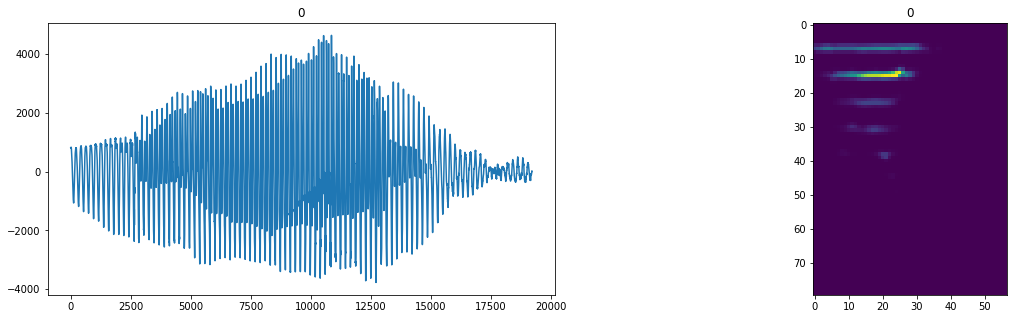

In [7]:
def plot(idx):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.title(f"{labels[idx]}")
    plt.plot(audios[idx])

    plt.subplot(1, 2, 2)
    plt.title(f"{labels[idx]}")
    plt.imshow(features[idx])

    display(Audio(audios[idx], rate=sample_rate))
plot(0)

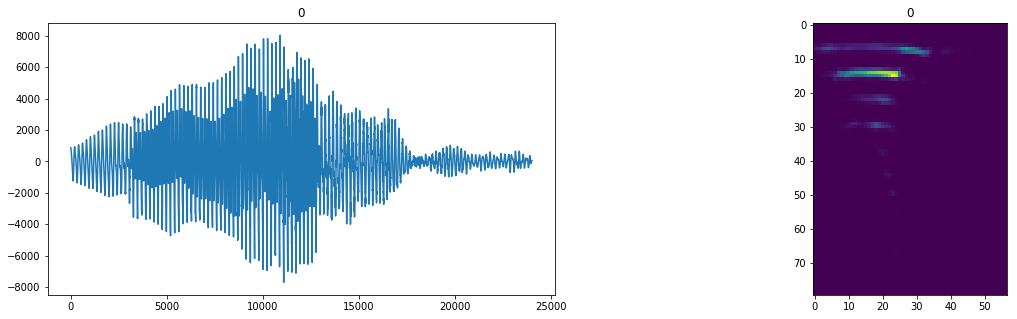

In [8]:
plot(2)

In [9]:
features_train, features_test, labels_train, labels_test = train_test_split(features_flatten, labels)

In [10]:
len(features_train), len(features_test), 

(791, 264)

In [11]:
labels_train

array([2, 1, 6, 9, 9, 4, 7, 0, 9, 8, 0, 4, 3, 7, 9, 6, 9, 2, 7, 9, 3, 0,
       3, 9, 2, 1, 0, 6, 9, 0, 6, 4, 0, 3, 3, 2, 5, 5, 3, 0, 6, 6, 6, 3,
       2, 1, 8, 3, 4, 6, 8, 9, 7, 9, 4, 2, 3, 3, 6, 0, 0, 3, 9, 6, 7, 2,
       2, 8, 0, 5, 7, 3, 0, 1, 5, 8, 5, 7, 9, 9, 7, 0, 5, 0, 1, 7, 5, 6,
       6, 1, 4, 6, 4, 2, 8, 0, 9, 3, 9, 3, 6, 1, 6, 2, 5, 7, 7, 2, 2, 1,
       0, 6, 9, 1, 4, 0, 5, 5, 8, 4, 1, 6, 3, 6, 5, 0, 3, 5, 1, 0, 0, 2,
       7, 0, 7, 7, 3, 8, 6, 4, 7, 2, 0, 8, 2, 6, 2, 0, 5, 2, 0, 6, 9, 5,
       7, 4, 7, 0, 6, 3, 9, 9, 9, 1, 3, 6, 1, 7, 9, 1, 4, 1, 9, 5, 5, 4,
       0, 4, 6, 4, 7, 4, 3, 1, 0, 7, 9, 5, 3, 4, 1, 0, 3, 0, 4, 5, 2, 3,
       4, 5, 0, 4, 5, 5, 1, 8, 9, 4, 1, 5, 1, 5, 8, 9, 9, 9, 7, 7, 6, 1,
       8, 5, 8, 0, 0, 3, 0, 8, 4, 6, 5, 0, 2, 3, 1, 6, 9, 7, 7, 2, 0, 2,
       2, 7, 1, 6, 1, 4, 6, 9, 5, 0, 2, 4, 0, 2, 8, 9, 2, 3, 9, 5, 5, 8,
       4, 1, 5, 5, 3, 2, 9, 5, 7, 2, 7, 6, 5, 3, 1, 2, 3, 0, 8, 5, 8, 2,
       9, 1, 0, 3, 5, 8, 0, 8, 9, 5, 5, 7, 4, 7, 5,

In [12]:
labels_test

array([9, 0, 9, 4, 6, 1, 7, 0, 3, 6, 4, 5, 7, 1, 6, 8, 0, 4, 0, 5, 5, 8,
       9, 4, 9, 3, 9, 8, 2, 2, 1, 0, 7, 3, 9, 5, 4, 7, 3, 4, 3, 7, 9, 3,
       6, 7, 9, 6, 0, 2, 2, 5, 7, 9, 1, 1, 6, 0, 7, 5, 1, 8, 7, 6, 9, 5,
       5, 5, 6, 6, 1, 1, 1, 6, 7, 5, 4, 7, 4, 0, 6, 3, 3, 2, 1, 6, 3, 5,
       7, 5, 6, 1, 0, 0, 2, 3, 7, 9, 1, 8, 9, 2, 4, 4, 6, 8, 4, 7, 7, 7,
       1, 3, 2, 7, 6, 2, 3, 7, 7, 5, 2, 0, 3, 0, 5, 8, 6, 1, 3, 7, 4, 7,
       6, 2, 5, 3, 3, 3, 7, 8, 0, 2, 7, 9, 7, 5, 3, 1, 4, 9, 5, 5, 0, 3,
       1, 2, 7, 3, 9, 3, 1, 6, 4, 5, 7, 4, 0, 9, 4, 6, 1, 2, 2, 2, 6, 0,
       7, 1, 5, 6, 4, 6, 2, 3, 8, 1, 0, 0, 3, 1, 0, 1, 8, 6, 7, 0, 8, 1,
       7, 4, 6, 5, 7, 3, 2, 2, 3, 1, 9, 5, 7, 9, 9, 0, 8, 2, 9, 5, 5, 2,
       4, 4, 8, 3, 3, 4, 1, 5, 7, 0, 0, 9, 1, 0, 6, 5, 1, 4, 0, 3, 9, 2,
       7, 2, 9, 9, 9, 2, 2, 0, 0, 0, 3, 6, 6, 4, 5, 5, 5, 0, 0, 6, 8, 0])

# Train model

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


In [13]:
model = RandomForestClassifier(max_depth=38, n_estimators=38, max_features=9)
#model = MLPClassifier(hidden_layer_sizes=(400, 200, 100, 50))

In [14]:
model.fit(X=features_train, y=labels_train)

RandomForestClassifier(max_depth=38, max_features=9, n_estimators=38)

# Save model

In [15]:
import pickle
filename = "model.pkl"
model_pickled = pickle.dumps(model)
with open(filename, 'wb') as f:
    f.write(model_pickled)

# Load model


In [16]:
import pickle
filename = "model.pkl"
with open(filename, 'rb') as f:
    model_pickled = f.read()
model = pickle.loads(model_pickled)

# Validate model

In [17]:
labels_test_predicted = model.predict(X=features_test)

In [18]:
labels_test_predicted

array([9, 0, 9, 4, 6, 1, 7, 0, 3, 6, 4, 5, 7, 1, 6, 8, 0, 4, 0, 5, 5, 1,
       9, 4, 9, 3, 9, 8, 2, 2, 1, 0, 7, 3, 9, 5, 4, 9, 3, 4, 3, 7, 9, 3,
       6, 7, 9, 6, 0, 2, 2, 5, 3, 9, 3, 1, 3, 0, 7, 5, 1, 1, 3, 5, 9, 5,
       5, 5, 6, 6, 1, 1, 1, 6, 7, 5, 4, 7, 4, 0, 6, 3, 3, 2, 1, 6, 3, 5,
       7, 5, 6, 1, 0, 0, 2, 3, 3, 9, 1, 8, 9, 2, 4, 4, 3, 8, 4, 3, 7, 7,
       1, 7, 2, 7, 6, 2, 3, 7, 7, 5, 2, 0, 3, 2, 5, 3, 6, 1, 3, 7, 4, 7,
       3, 2, 5, 3, 3, 3, 7, 8, 0, 2, 7, 9, 9, 5, 3, 1, 4, 9, 5, 5, 0, 3,
       9, 2, 7, 3, 9, 3, 1, 6, 4, 5, 7, 4, 5, 9, 4, 6, 1, 2, 2, 2, 5, 0,
       7, 9, 5, 6, 6, 6, 2, 3, 8, 9, 0, 0, 3, 1, 0, 1, 8, 6, 7, 0, 8, 1,
       7, 4, 6, 5, 7, 3, 2, 2, 3, 1, 9, 5, 9, 7, 4, 0, 8, 2, 9, 5, 5, 2,
       4, 3, 8, 3, 3, 4, 1, 5, 7, 0, 0, 9, 1, 0, 6, 5, 1, 4, 0, 1, 9, 2,
       7, 2, 9, 9, 9, 0, 2, 0, 0, 0, 3, 6, 6, 4, 5, 5, 5, 0, 0, 7, 8, 0])

In [19]:
labels_test

array([9, 0, 9, 4, 6, 1, 7, 0, 3, 6, 4, 5, 7, 1, 6, 8, 0, 4, 0, 5, 5, 8,
       9, 4, 9, 3, 9, 8, 2, 2, 1, 0, 7, 3, 9, 5, 4, 7, 3, 4, 3, 7, 9, 3,
       6, 7, 9, 6, 0, 2, 2, 5, 7, 9, 1, 1, 6, 0, 7, 5, 1, 8, 7, 6, 9, 5,
       5, 5, 6, 6, 1, 1, 1, 6, 7, 5, 4, 7, 4, 0, 6, 3, 3, 2, 1, 6, 3, 5,
       7, 5, 6, 1, 0, 0, 2, 3, 7, 9, 1, 8, 9, 2, 4, 4, 6, 8, 4, 7, 7, 7,
       1, 3, 2, 7, 6, 2, 3, 7, 7, 5, 2, 0, 3, 0, 5, 8, 6, 1, 3, 7, 4, 7,
       6, 2, 5, 3, 3, 3, 7, 8, 0, 2, 7, 9, 7, 5, 3, 1, 4, 9, 5, 5, 0, 3,
       1, 2, 7, 3, 9, 3, 1, 6, 4, 5, 7, 4, 0, 9, 4, 6, 1, 2, 2, 2, 6, 0,
       7, 1, 5, 6, 4, 6, 2, 3, 8, 1, 0, 0, 3, 1, 0, 1, 8, 6, 7, 0, 8, 1,
       7, 4, 6, 5, 7, 3, 2, 2, 3, 1, 9, 5, 7, 9, 9, 0, 8, 2, 9, 5, 5, 2,
       4, 4, 8, 3, 3, 4, 1, 5, 7, 0, 0, 9, 1, 0, 6, 5, 1, 4, 0, 3, 9, 2,
       7, 2, 9, 9, 9, 2, 2, 0, 0, 0, 3, 6, 6, 4, 5, 5, 5, 0, 0, 6, 8, 0])

In [20]:
(labels_test_predicted == labels_test).mean()

0.8901515151515151

In [21]:
labels_test_predicted

array([9, 0, 9, 4, 6, 1, 7, 0, 3, 6, 4, 5, 7, 1, 6, 8, 0, 4, 0, 5, 5, 1,
       9, 4, 9, 3, 9, 8, 2, 2, 1, 0, 7, 3, 9, 5, 4, 9, 3, 4, 3, 7, 9, 3,
       6, 7, 9, 6, 0, 2, 2, 5, 3, 9, 3, 1, 3, 0, 7, 5, 1, 1, 3, 5, 9, 5,
       5, 5, 6, 6, 1, 1, 1, 6, 7, 5, 4, 7, 4, 0, 6, 3, 3, 2, 1, 6, 3, 5,
       7, 5, 6, 1, 0, 0, 2, 3, 3, 9, 1, 8, 9, 2, 4, 4, 3, 8, 4, 3, 7, 7,
       1, 7, 2, 7, 6, 2, 3, 7, 7, 5, 2, 0, 3, 2, 5, 3, 6, 1, 3, 7, 4, 7,
       3, 2, 5, 3, 3, 3, 7, 8, 0, 2, 7, 9, 9, 5, 3, 1, 4, 9, 5, 5, 0, 3,
       9, 2, 7, 3, 9, 3, 1, 6, 4, 5, 7, 4, 5, 9, 4, 6, 1, 2, 2, 2, 5, 0,
       7, 9, 5, 6, 6, 6, 2, 3, 8, 9, 0, 0, 3, 1, 0, 1, 8, 6, 7, 0, 8, 1,
       7, 4, 6, 5, 7, 3, 2, 2, 3, 1, 9, 5, 9, 7, 4, 0, 8, 2, 9, 5, 5, 2,
       4, 3, 8, 3, 3, 4, 1, 5, 7, 0, 0, 9, 1, 0, 6, 5, 1, 4, 0, 1, 9, 2,
       7, 2, 9, 9, 9, 0, 2, 0, 0, 0, 3, 6, 6, 4, 5, 5, 5, 0, 0, 7, 8, 0])

load model

In [22]:
import pickle
filename = "model.pkl"
with open(filename, 'rb') as f:
    model_pickled = f.read()
model = pickle.loads(model_pickled)

In [23]:
for digit in range(10):
    mask = labels_test == digit
    accuracy = (labels_test_predicted[mask] == labels_test[mask]).mean()
    print(f"{digit}: {accuracy:.3f}")

0: 0.935
1: 0.852
2: 0.960
3: 0.931
4: 0.913
5: 1.000
6: 0.786
7: 0.788
8: 0.786
9: 0.920


load file

In [24]:
file_path = "dataset/unk.wav"
sample_rate, audio = read(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/unk.wav'

prepare feature

In [ ]:
max_duration_sec = 0.6
max_duration = int(max_duration_sec * sample_rate + 1e-6)
if len(audio) < max_duration:
    audio = np.pad(audio, (0, max_duration - len(audio)), constant_values=0)
feature = librosa.feature.melspectrogram(audio.astype(float), sample_rate, n_mels=16, fmax=1000)
features_flatten = feature.reshape(-1)

prediction

In [ ]:
answer = model.predict([features_flatten])[0]
answer